# Getting Started
In this notebook you will learn how to run your first simulation with fuse.


## Imports

In [1]:
import fuse
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
from tqdm import tqdm
import tqdm.notebook as tq
import pandas as pd
from sklearn.cluster import DBSCAN


You specified _auto_append_rucio_local=True and you are not on dali compute nodes, so we will add the following rucio local path: /project/lgrandi/rucio/


/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.9/site-packages/straxen/url_config.py:743: UserWarning: From straxen version 2.1.0 onward, URLConfig parameterswill be sorted alphabetically before being passed to the plugins, this will change the lineage hash for non-sorted URLs. To load data processed with non-sorted URLs, you will need to use an older version.
  warnings.warn(


In [2]:
st = fuse.context.full_chain_context(output_folder = "./fuse_data")
st.set_config({"path": "/project2/lgrandi/layos/",
               "file_name": "output_n_Veto_neutron_AmBe_1.root",
               "entry_stop": 2000,
               "nv_output": True,#On inclus les pmts du Neutron Veto (par defaut False)
               "debug": True,
               "file_size_limit": 500/1e4,#Poser question a Hening sur cela....
               })

run_number = "00003"#Attention à ce parametre, aujourd'hui triviale, mais qui tiens en compte du mapping pour la TPC en fonction du run.

Warning! elife not in context config, skipping...
Warning! electron_drift_velocity not in context config, skipping...
Warning! electron_drift_time_gate not in context config, skipping...


/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.9/site-packages/strax/context.py:349: UserWarning: Provides of multi-output plugins overlap, deregister old plugins <class 'straxen.plugins.raw_records.daqreader.DAQReader'>.
  warnings.warn(
/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.9/site-packages/strax/context.py:349: UserWarning: Provides of multi-output plugins overlap, deregister old plugins <class 'straxen.plugins.raw_records.daqreader.DAQReader'>.
  warnings.warn(
/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.9/site-packages/strax/context.py:349: UserWarning: Provides of multi-output plugins overlap, deregister old plugins <class 'straxen.plugins.raw_records.daqreader.DAQReader'>.
  warnings.warn(
/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.9/site-packages/strax/context.py:349: UserWarning: Provides of multi-output plugins overlap, deregister old plugins <class 'straxen.plugins.raw_records.daqreader.DAQReader'>.
  warnings.wa

In [3]:
nv_pmthits = st.get_array(run_number, "nv_pmthits")

Loading nv_pmthits: |          | 0.00 % [00:00<?]

In [4]:
nv_hitlet = fuse.neutron_veto.NeutronVetoHitlets()

In [9]:
hitlets_nv=nv_hitlet.compute(nv_pmthits)

Applying QE and CE
Loading hit survive
Sampling hitlets charge pe
Getting time hitlets


In [10]:
hitlets_nv_stacked=nv_hitlet.compute(nv_pmthits,Stacked_opt='yes')

Applying QE and CE
Loading hit survive
Sampling hitlets charge pe
Getting time hitlets
Looking for stacket hitlets


  0%|          | 0/1824 [00:00<?, ?it/s]

In [11]:
#Hitlets_nv is an array to be computed by strax plugin, exemple
import cutax
st = cutax.contexts.xenonnt_online()
strax_nv = st.get_single_plugin('0', 'events_nv')
events_nv = strax_nv.compute(hitlets_nv,min(hitlets_nv['time']),max(hitlets_nv['time']))
events_nv_stacket = strax_nv.compute(hitlets_nv_stacked,min(hitlets_nv_stacked['time']),max(hitlets_nv_stacked['time']))

You specified _auto_append_rucio_local=True and you are not on dali compute nodes, so we will add the following rucio local path: /project/lgrandi/rucio/


(array([  4.,  61.,  90., 127., 164., 201., 200., 179., 173., 148., 126.,
         94.,  61.,  54.,  41.,   9.,  10.,   6.,   4.,   3.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ,
        27.5, 30. , 32.5, 35. , 37.5, 40. , 42.5, 45. , 47.5, 50. ]),
 <BarContainer object of 20 artists>)

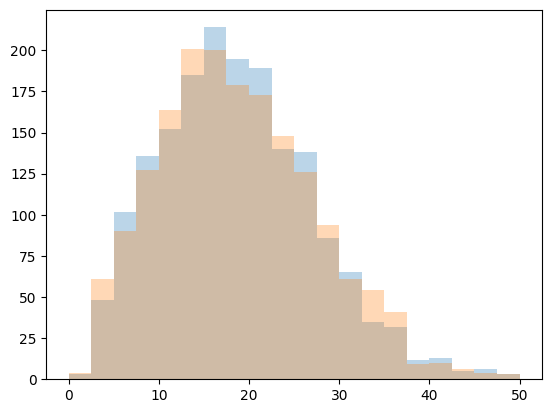

In [12]:
plt.hist(events_nv['area'], range=[0,50],bins=20,alpha=0.3)
plt.hist(events_nv_stacket['area'], range=[0,50],bins=20,alpha=0.3)